connect 4
---

In [1]:
import os
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
plt.style.use("dark_background")

In [141]:
class GameBoard:
    def __init__(self, board_shape = (6,7)):
        self.shape = board_shape
        self.grid = np.full(board_shape, 0)
        black = (0.2,0.2,0.2)
        red = (0.9, 0.3,0.3)
        blue = (0.3,0.3,0.9)
        self.colors = {
            0:black,
            1:red,
            -1:blue
        }
        
    def drop(self, color, column):
        #check if the column is full
        if self.grid[0,column] != 0:
            print(f'Cannot drop a {color} in full column {column}!')
            return self.grid
        else:
            dropping = True
            current_row = 0
            while dropping:
                #if it hits the bottom, stop falling
                if current_row == self.shape[0]-1:
                    dropping = False
                #if the next row is empty, drop to it
                elif self.grid[current_row + 1, column] == 0:
                    current_row += 1
                else:
                    dropping = False
            self.grid[current_row, column] = color
            return self.grid
    
    def grid_to_color(self, color_dict_in = None):
        if color_dict_in == None:
            color_dict = self.colors
        else:
            color_dict = color_dict_in
        color_grid = self.grid
        color_grid = [
            [
                color_dict[value]
                for value in row
            ]
            for row in color_grid
        ]
        color_grid = np.array(color_grid)
        return color_grid
    
    def show(self, figsize = (6,7), colors = None):
#         if colors == None:
#             color_dict
        fig, ax = plt.subplots(figsize = figsize)
        grid_pic = self.grid_to_color()
        plt.imshow(grid_pic)
        ax.set_xticks(np.arange(-.5, 7, 1))
        ax.set_yticks(np.arange(-.5, 6, 1))
        plt.grid(True)
                    

In [142]:
board = GameBoard()
board.drop(1,5)
board.drop(-1,4)
board.drop(1,6)
board.drop(-1,6)
board.drop(1,6)

array([[ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, -1],
       [ 0,  0,  0,  0, -1,  1,  1]])

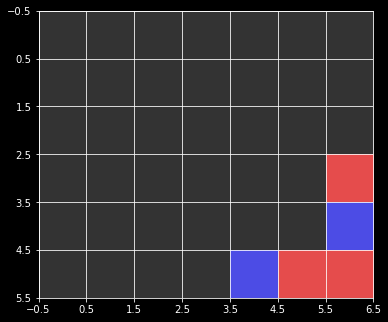

In [143]:
board.show()